In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [30]:
df1 = np.loadtxt("/Users/katy/Documents/Mirea/5 сем/пзмс/ПР6/1.txt")
df = pd.DataFrame(df1, columns = ['values'])
df.describe()

,values
count,64.000000
mean,0.066543
std,1.422214
min,-2.829814
25%,-1.168877
50%,0.171591
75%,1.348351
max,2.455552


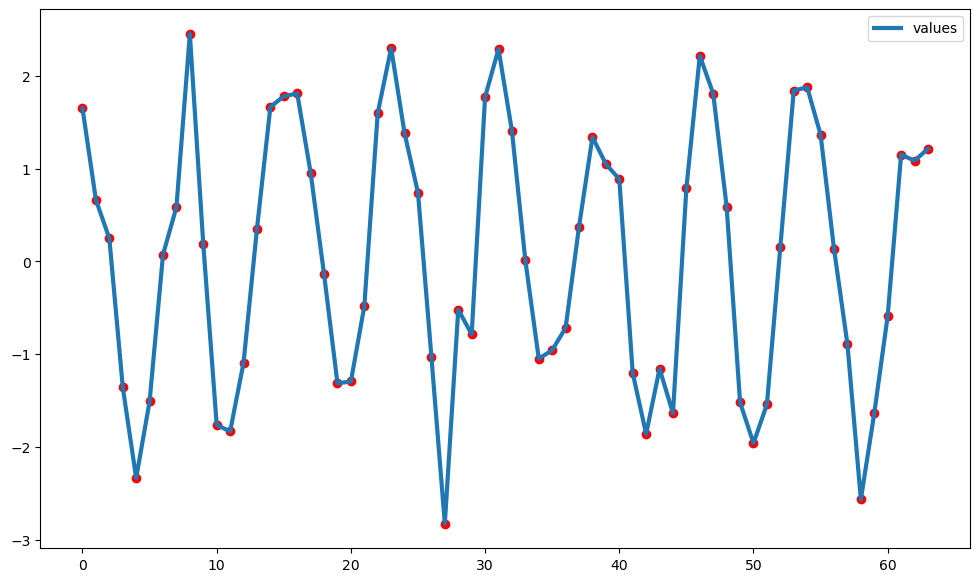

In [31]:
df.plot(figsize = (12, 7), linewidth = 3)
plt.scatter(df.index, df["values"], c = "r")
plt.legend()
None

In [32]:
def dicki_Fuller(data):
    test = sm.tsa.adfuller(data)
    
    print ('p-value: ', test[1])
    print ('Critical values: ', test[4])
    
    
    if test[0] > test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')


dicki_Fuller(df)

p-value:  1.1419209489116248e-15
Critical values:  {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}
единичных корней нет, ряд стационарен


## Простое скользящее среднее: SMA рассчитывается путем взятия невзвешенного среднего из k (размер окна) наблюдений за время, которое присутствует в текущем окне. Он используется для анализа тенденций.

<Figure size 15000x7000 with 0 Axes>

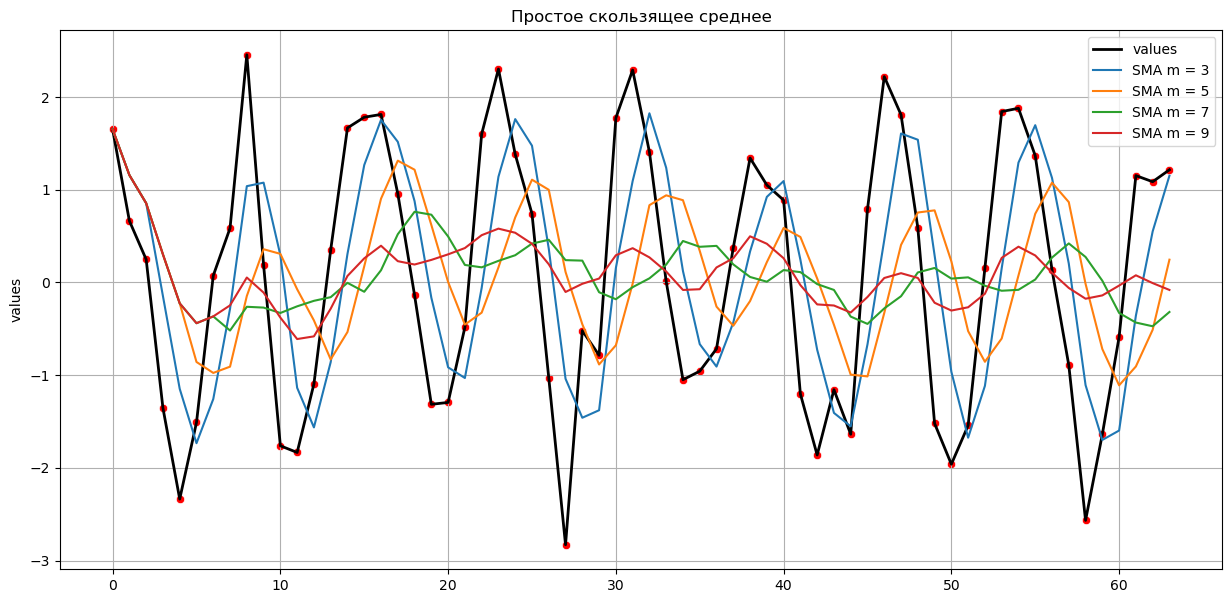

In [33]:
def SMA_plot(data):
    plt.figure(figsize= (15, 7), dpi= 1000)
    data.plot(figsize= (15, 7), linewidth = 2, color = "black")
    lst = [3, 5, 7, 9]
    
    sns.scatterplot(x = data.index, y = data['values'], color = "r")
    plt.plot(data["values"].rolling(window = lst[0], min_periods= 1).mean(), label = 'SMA m = 3')
    plt.plot(data["values"].rolling(window = lst[1], min_periods= 1).mean(), label = 'SMA m = 5')
    plt.plot(data["values"].rolling(window = lst[2], min_periods= 1).mean(), label = 'SMA m = 7')
    plt.plot(data["values"].rolling(window = lst[3], min_periods= 1).mean(), label = 'SMA m = 9')
    
    plt.grid()
    plt.title('Простое скользящее среднее')
    plt.legend()
    
SMA_plot(df)

### Мы получаем WMA путем умножения каждого числа в наборе данных на заранее определенный вес и суммирования полученных значений.

In [34]:
def wma(arr, period):
    kernel = np.arange(period, 0, -1)
    kernel = np.concatenate([np.zeros(period - 1), kernel / kernel.sum()])
    return np.convolve(arr, kernel, 'same')

### Взвешенная скользящая средняя (WMA) - это технический индикатор, который присваивает больший вес самым последним точкам данных и меньший вес точкам данных.

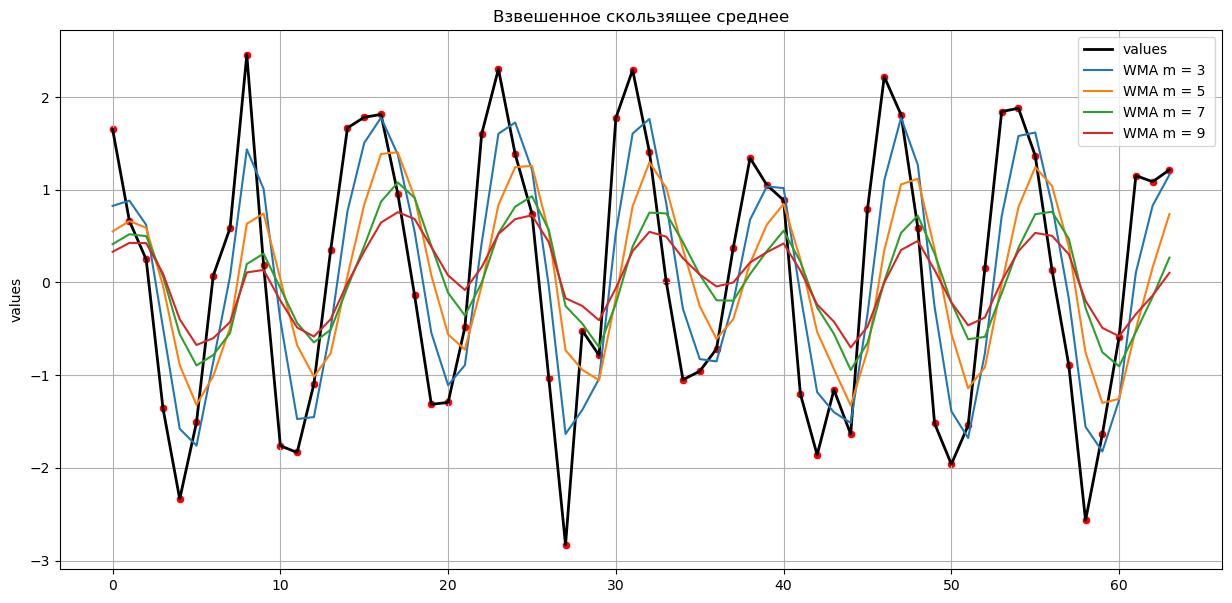

In [36]:
def WMA_PLOT(data):
    data.plot(figsize= (15, 7), linewidth = 2, color = "black")
    sns.scatterplot(x = data.index, y = data['values'], color = "r")
    lst = [3, 5, 7, 9]
    
    plt.plot(wma(data['values'], lst[0]), label = 'WMA m = 3 ')
    plt.plot(wma(data['values'], lst[1]), label = 'WMA m = 5 ')
    plt.plot(wma(data['values'], lst[2]), label = 'WMA m = 7 ')
    plt.plot(wma(data['values'], lst[3]), label = 'WMA m = 9')
    
    plt.grid()
    plt.title('Взвешенное скользящее среднее')
    plt.legend()
    
WMA_PLOT(df)

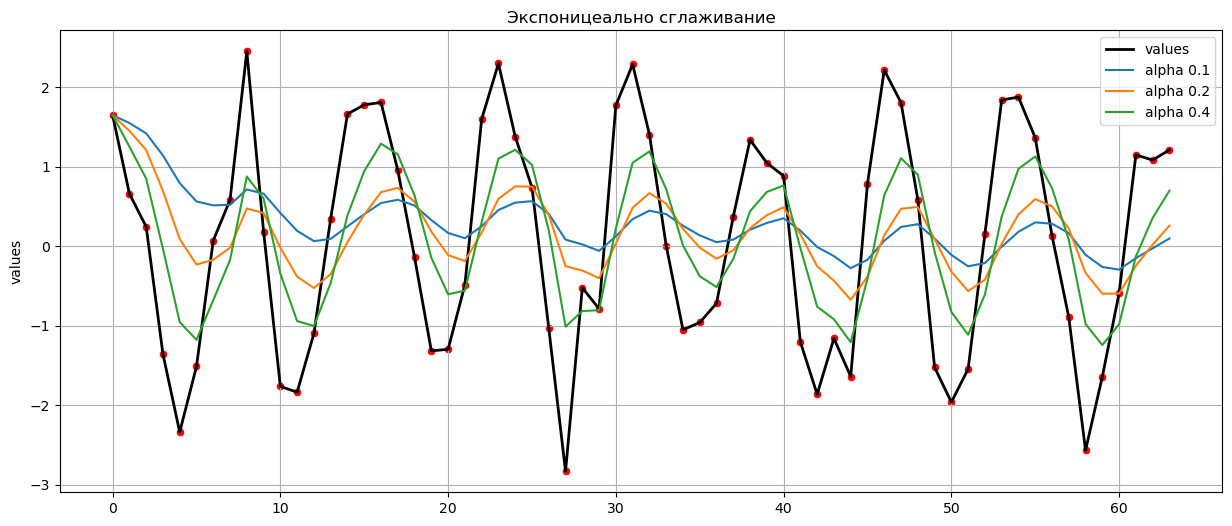

In [37]:
def EMA_plots(data):
    data.plot(figsize= (15, 6), color = "black", linewidth = 2,)
    sns.scatterplot(x = data.index, y = data['values'], color = "r", alpha= 1)
    
    # Сглаженные графики по EMA
    plt.plot(data["values"].ewm(alpha=0.1, adjust=False).mean(), label = "alpha 0.1")
    plt.plot(data["values"].ewm(alpha=0.2, adjust=False).mean(), label = "alpha 0.2")
    plt.plot(data["values"].ewm(alpha=0.4, adjust=False).mean(), label = "alpha 0.4")
    
    plt.grid()
    plt.title('Экспоницеально сглаживание')
    plt.legend()
    
EMA_plots(df)    

# DEMA = 2EMA - EMA(EMA)

In [38]:
def DEMA(data, alpha):
    EMA = data["values"].ewm(alpha = alpha, adjust=False).mean()
    DEMA = 2*EMA - EMA.ewm(alpha = alpha, adjust=False).mean()
    return DEMA

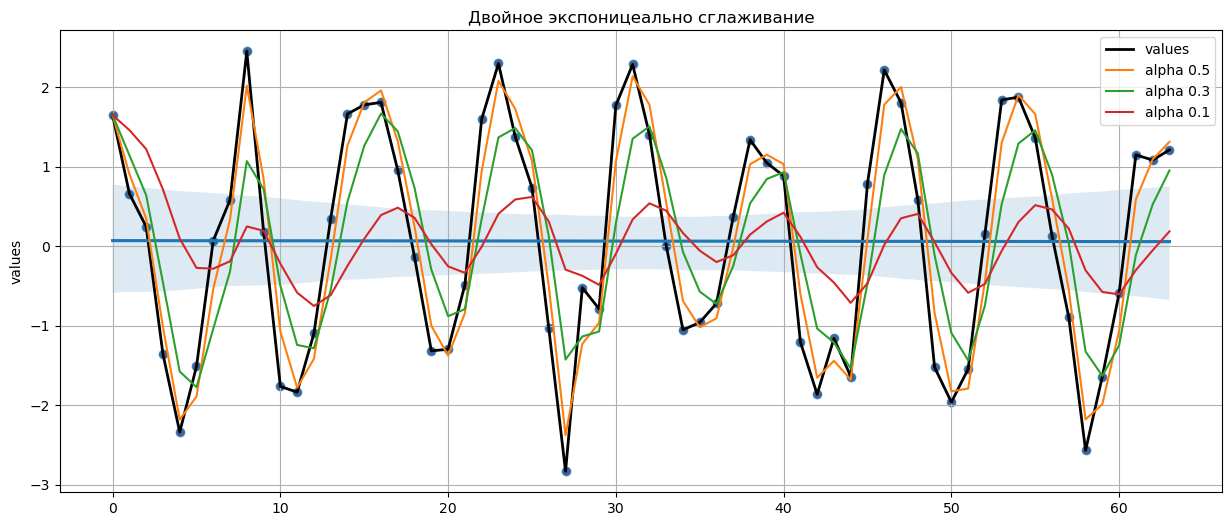

In [39]:
def DEMA_plots(data):
    data.plot(figsize= (15, 6), color = "black", linewidth = 2,)
    sns.scatterplot(x = data.index, y = data['values'], color = "r", alpha= 1)
    
    sns.regplot(x = df.index, y = df.values) 
    
    plt.plot(DEMA(df, 0.5), label = "alpha 0.5")
    plt.plot(DEMA(df, 0.3), label = "alpha 0.3")
    plt.plot(DEMA(df, 0.1), label = "alpha 0.1")
    
    plt.grid()
    plt.title('Двойное экспоницеально сглаживание')
    plt.legend()
    
DEMA_plots(df)    

In [44]:
# alpha = 0.1
# exp_r = [df['values'][0]]
# for i in range(1, len(df['values'])):
#     exp_r.append(alpha * df['values'][i] + (1 - alpha) * exp_r[i - 1])

In [45]:
# plt.plot(exp_r)
# plt.plot(df["values"])

In [43]:
model = sm.OLS.from_formula("df.values ~ df.index",  data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              df.values   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                 0.0004235
Date:                Sat, 11 Feb 2023   Prob (F-statistic):              0.984
Time:                        18:50:29   Log-Likelihood:                -112.85
No. Observations:                  64   AIC:                             229.7
Df Residuals:                      62   BIC:                             234.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0728      0.354      0.206      0.838      -0.635       0.781
df.index      -0.0002      0.010     -0.021      0.984      -0.020       0.019
==============================================================================
Omnibus:                       15.451   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.808
Skew:                          -0.116   Prob(JB):                        0.149
Kurtosis:                       1.828   Cond. No.                         72.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
df1 = np.loadtxt("/Users/katy/Documents/Mirea/5 сем/пзмс/ПР6/2.txt")
df = pd.DataFrame(df1, columns = ['values'])
df.describe()

,values
count,64.000000
mean,15.875823
std,9.749458
min,-5.368793
25%,8.707672
50%,16.626216
75%,23.300313
max,39.994029


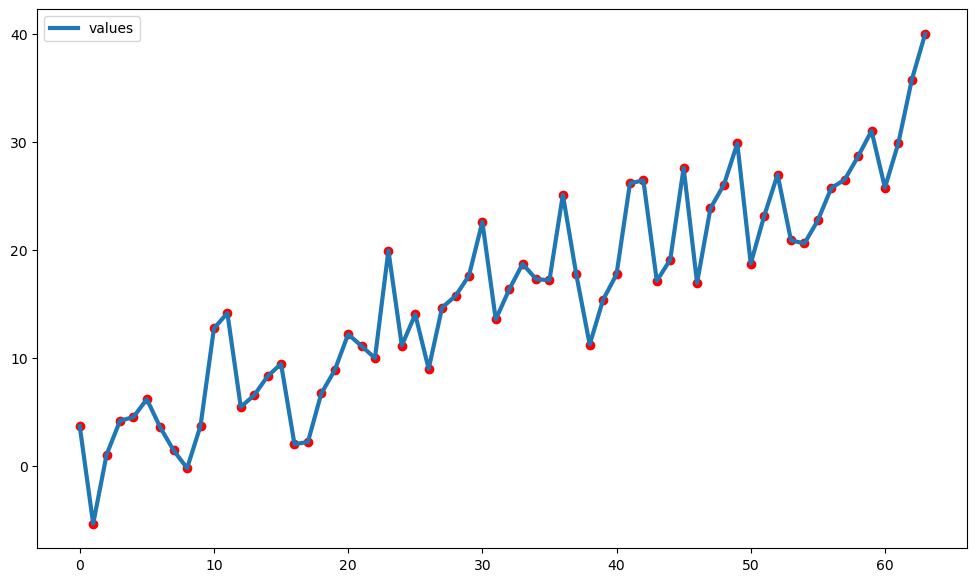

In [51]:
df.plot(figsize = (12, 7), linewidth = 3)
plt.scatter(df.index, df["values"], c = "r")
plt.legend()
None

In [52]:
def dicki_Fuller(data):
    test = sm.tsa.adfuller(data)
    
    print ('p-value: ', test[1])
    print ('Critical values: ', test[4])
    
    
    if test[0] > test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')


dicki_Fuller(df)

p-value:  0.9226068444577415
Critical values:  {'1%': -3.5443688564814813, '5%': -2.9110731481481484, '10%': -2.5931902777777776}
есть единичные корни, ряд не стационарен


<Figure size 15000x7000 with 0 Axes>

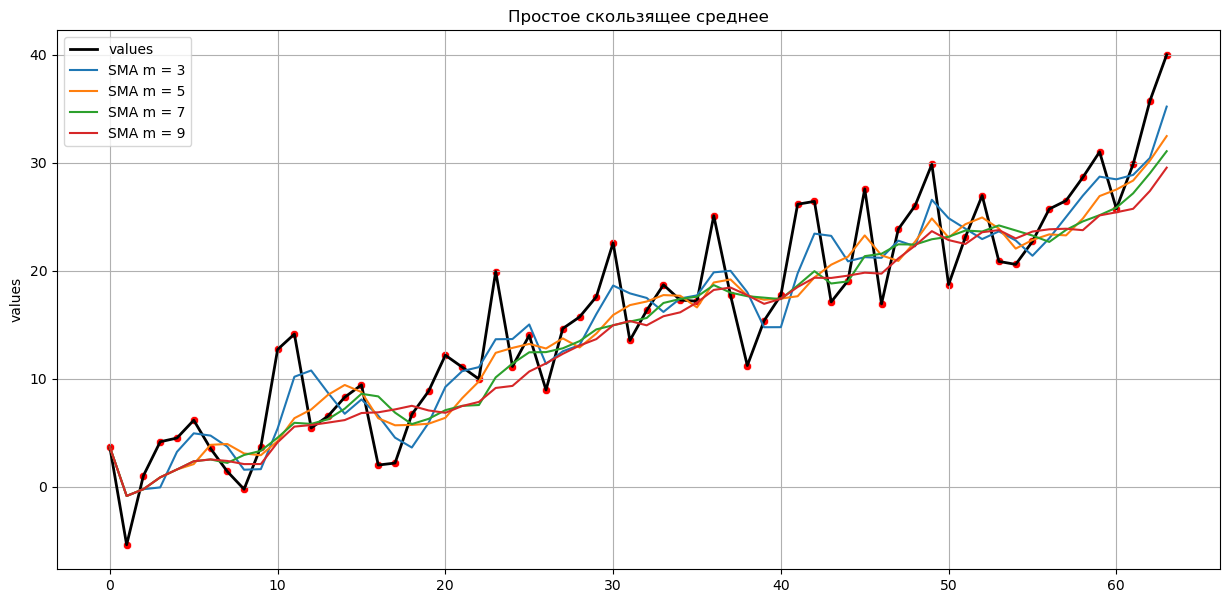

In [53]:
def SMA_plot(data):
    plt.figure(figsize= (15, 7), dpi= 1000)
    data.plot(figsize= (15, 7), linewidth = 2, color = "black")
    lst = [3, 5, 7, 9]
    
    sns.scatterplot(x = data.index, y = data['values'], color = "r")
    plt.plot(data["values"].rolling(window = lst[0], min_periods= 1).mean(), label = 'SMA m = 3')
    plt.plot(data["values"].rolling(window = lst[1], min_periods= 1).mean(), label = 'SMA m = 5')
    plt.plot(data["values"].rolling(window = lst[2], min_periods= 1).mean(), label = 'SMA m = 7')
    plt.plot(data["values"].rolling(window = lst[3], min_periods= 1).mean(), label = 'SMA m = 9')
    
    plt.grid()
    plt.title('Простое скользящее среднее')
    plt.legend()
    
SMA_plot(df)

In [54]:
def wma(arr, period):
    kernel = np.arange(period, 0, -1)
    kernel = np.concatenate([np.zeros(period - 1), kernel / kernel.sum()])
    return np.convolve(arr, kernel, 'same')

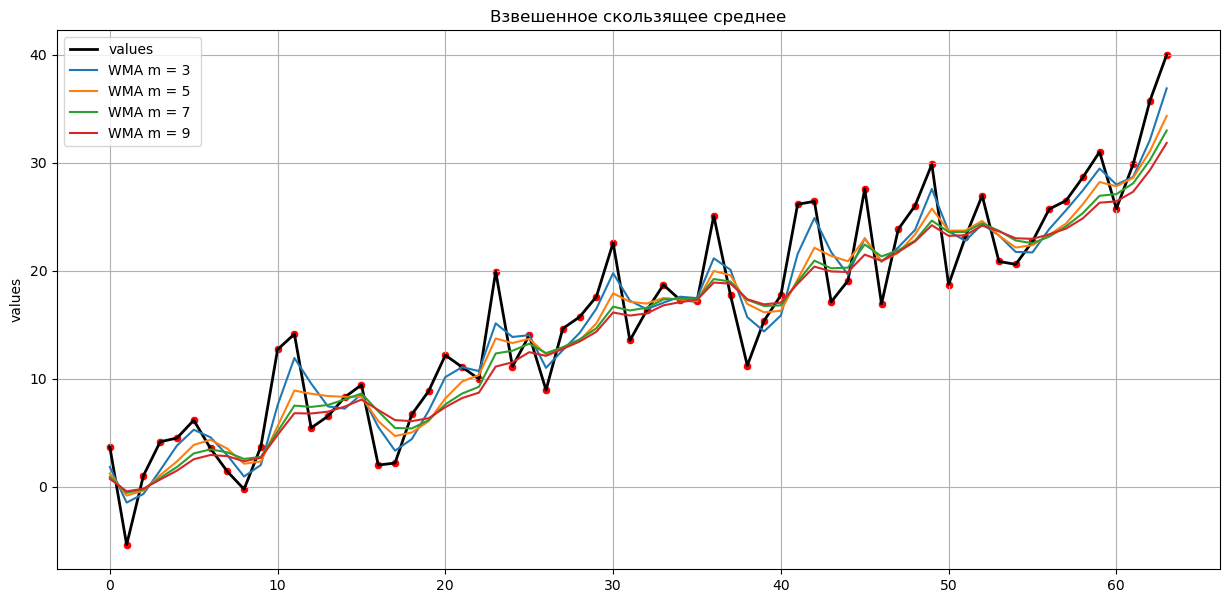

In [55]:
def WMA_PLOT(data):
    data.plot(figsize= (15, 7), linewidth = 2, color = "black")
    sns.scatterplot(x = data.index, y = data['values'], color = "r")
    lst = [3, 5, 7, 9]
    
    plt.plot(wma(data['values'], lst[0]), label = 'WMA m = 3 ')
    plt.plot(wma(data['values'], lst[1]), label = 'WMA m = 5 ')
    plt.plot(wma(data['values'], lst[2]), label = 'WMA m = 7 ')
    plt.plot(wma(data['values'], lst[3]), label = 'WMA m = 9')
    
    plt.grid()
    plt.title('Взвешенное скользящее среднее')
    plt.legend()
    
WMA_PLOT(df)

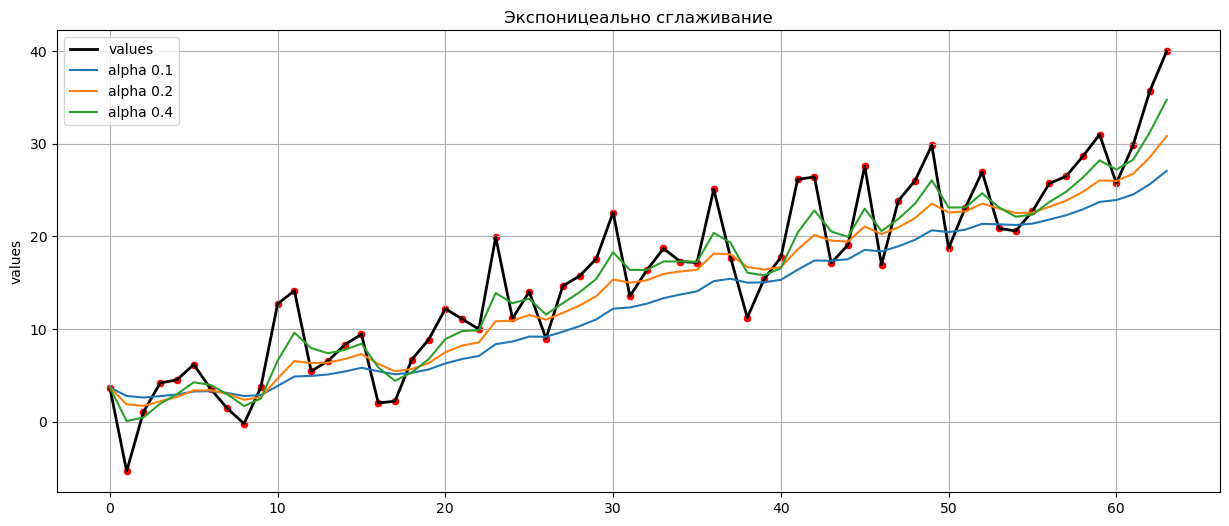

In [56]:
def EMA_plots(data):
    data.plot(figsize= (15, 6), color = "black", linewidth = 2,)
    sns.scatterplot(x = data.index, y = data['values'], color = "r", alpha= 1)
    
    # Сглаженные графики по EMA
    plt.plot(data["values"].ewm(alpha=0.1, adjust=False).mean(), label = "alpha 0.1")
    plt.plot(data["values"].ewm(alpha=0.2, adjust=False).mean(), label = "alpha 0.2")
    plt.plot(data["values"].ewm(alpha=0.4, adjust=False).mean(), label = "alpha 0.4")
    
    plt.grid()
    plt.title('Экспоницеально сглаживание')
    plt.legend()
    
EMA_plots(df)    

In [57]:
def DEMA(data, alpha):
    EMA = data["values"].ewm(alpha = alpha, adjust=False).mean()
    DEMA = 2*EMA - EMA.ewm(alpha = alpha, adjust=False).mean()
    return DEMA

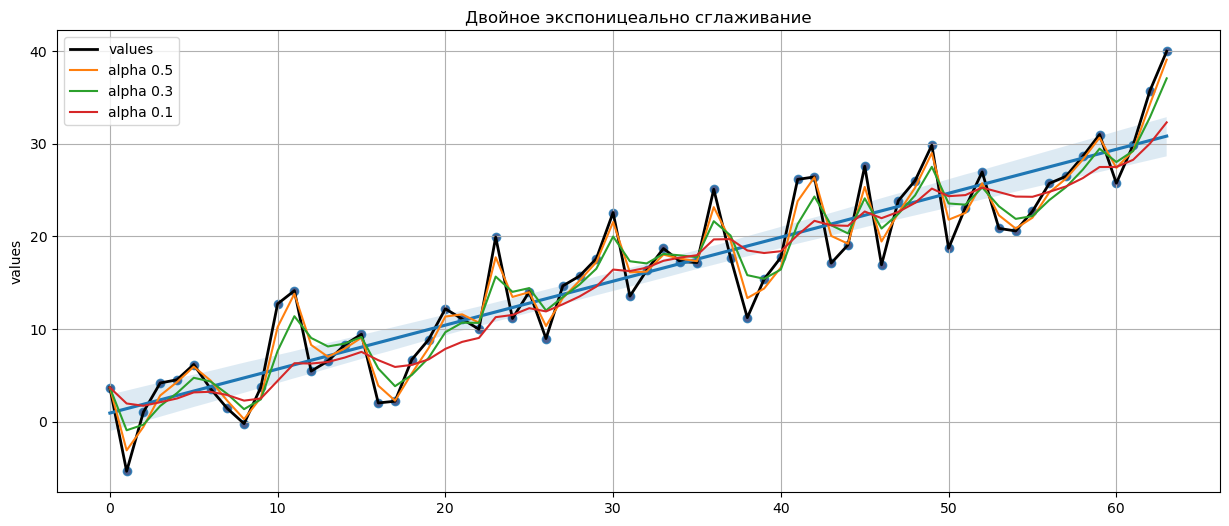

In [58]:
def DEMA_plots(data):
    data.plot(figsize= (15, 6), color = "black", linewidth = 2,)
    sns.scatterplot(x = data.index, y = data['values'], color = "r", alpha= 1)
    
    sns.regplot(x = df.index, y = df.values) 
    
    plt.plot(DEMA(df, 0.5), label = "alpha 0.5")
    plt.plot(DEMA(df, 0.3), label = "alpha 0.3")
    plt.plot(DEMA(df, 0.1), label = "alpha 0.1")
    
    plt.grid()
    plt.title('Двойное экспоницеально сглаживание')
    plt.legend()
    
DEMA_plots(df)    

In [59]:
model = sm.OLS.from_formula("df.values ~ df.index",  data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              df.values   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     286.5
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           6.33e-25
Time:                        18:53:50   Log-Likelihood:                -180.80
No. Observations:                  64   AIC:                             365.6
Df Residuals:                      62   BIC:                             369.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9205      1.024      0.899      0.372      -1.127       2.968
df.index       0.4748      0.028     16.926      0.000       0.419       0.531
==============================================================================
Omnibus:                        1.401   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                1.402
Skew:                           0.273   Prob(JB):                        0.496
Kurtosis:                       2.524   Cond. No.                         72.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""